# Batting Metrics
### Author: Ryan Berns

**Data**
https://github.com/chadwickbureau/baseballdatabank

---
## I. Batting Average & OBP

In [1]:
import pandas as pd
pd.options.display.max_columns = 999

In [2]:
batting = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv",sep=',')

In [3]:
players = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv",sep=',')

In [4]:
battingPlayers = pd.merge(batting,players,left_on="playerID",right_on="playerID",how='inner')

In [5]:
battingPlayers = battingPlayers.assign(age = (battingPlayers.yearID - battingPlayers.birthYear))

---
### Batting Average

Batting average is the most common baseball metric which many passive fans also understand. As a refresher, batting average is just the proportion of at bats a player has that results in a hit.

$Batting Average = \frac{Hits}{At Bats}$

In [6]:
# Calculate Batting average
battingPlayers = battingPlayers.assign(BA = round((battingPlayers.H/battingPlayers.AB),3))

In [7]:
battingPlayers.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,age,BA
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,1850.0,1.0,2.0,USA,OK,Fort Towson,1939.0,11.0,11.0,USA,PA,Philadelphia,Frank,Abercrombie,Francis Patterson,NaN,NaN,NaN,NaN,1871-10-21,1871-10-21,aberd101,abercda01,21.0,0.000
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,1842.0,2.0,NaN,CAN,ON,Port Hope,1910.0,4.0,9.0,USA,ID,Pocatello,Bob,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,1877-10-06,addyb101,addybo01,29.0,0.271
2,addybo01,1873,1,PH2,NaN,10,51,12,16,1,0,0,10.0,1.0,1.0,2,0.0,NaN,NaN,NaN,NaN,0.0,1842.0,2.0,NaN,CAN,ON,Port Hope,1910.0,4.0,9.0,USA,ID,Pocatello,Bob,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,1877-10-06,addyb101,addybo01,31.0,0.314
3,addybo01,1873,2,BS1,NaN,31,152,37,54,6,3,1,32.0,6.0,5.0,2,1.0,NaN,NaN,NaN,NaN,0.0,1842.0,2.0,NaN,CAN,ON,Port Hope,1910.0,4.0,9.0,USA,ID,Pocatello,Bob,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,1877-10-06,addyb101,addybo01,31.0,0.355
4,addybo01,1874,1,HR1,NaN,50,213,25,51,9,2,0,22.0,4.0,2.0,1,1.0,NaN,NaN,NaN,NaN,0.0,1842.0,2.0,NaN,CAN,ON,Port Hope,1910.0,4.0,9.0,USA,ID,Pocatello,Bob,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,1877-10-06,addyb101,addybo01,32.0,0.239


Let's take a look at the top batting averages for players with at least 100 at bats

In [8]:
battingPlayers.loc[(battingPlayers.AB > 100),['nameFirst','nameLast','bats','yearID','teamID','age','BA']]\
                .sort_values('BA', ascending=False).head()

,nameFirst,nameLast,bats,yearID,teamID,age,BA
390,Levi,Meyerle,R,1871,PH1,22.0,0.492
5476,Hugh,Duffy,R,1894,BSN,28.0,0.440
3185,Tip,O'Neill,R,1887,SL4,29.0,0.435
57,Ross,Barnes,R,1873,BS1,23.0,0.431
381,Cal,McVey,R,1871,BS1,22.0,0.431


The top 5 leaders of single season batting average were in the 19th century.  Although still impressive, this might be more telling of the type of play of the day rather than legendary skills at the plate.
> <h4> Who is Levi Meyerle?</h4> Levi was an infielder for the Philadelphia Athletics of the National Association.  The National Association was the predecessor of MLB's National league.  The league was founded in 1871 and lasted just 4 years until 1875.  Levi's record batting average of 0.492 is actually not considered a "record" by the MLB as they do not recognize statistics from the NA.  After bouncing around a bit after the 1871 season, Levin returned to the Philadelphia Athletics for their inaugural season in the National League.  The team was expelled from the league in 1876 where Levi went on to play for the Reds.  Levin finished his career with a career average of .356, 10 home runs and 276 RBIs.
*Source: https://en.wikipedia.org/wiki/Levi_Meyerle*

Let's see how batting average has trended in aggregate over the years

In [22]:
BA_by_yr = battingPlayers.loc[(battingPlayers.AB > 100),['yearID','BA']].groupby(battingPlayers.yearID).mean()

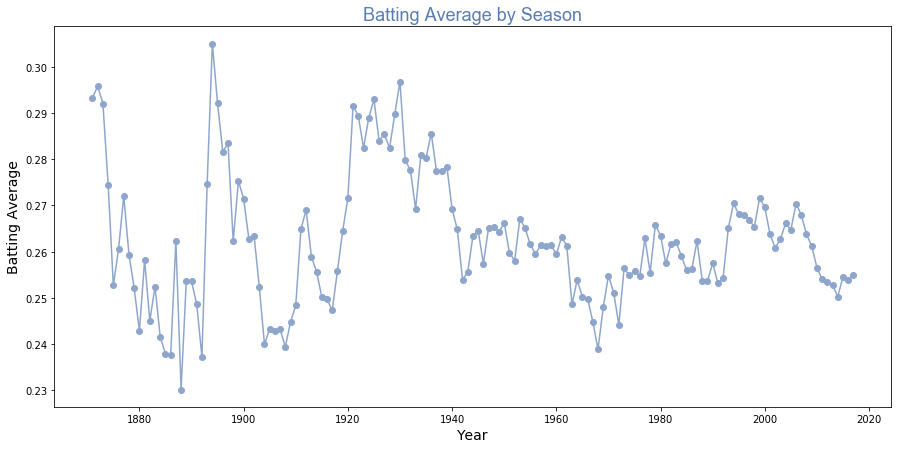

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(15,7))
plt.plot('yearID', 'BA', data=BA_by_yr, marker='o', color='#8ea6cc')
plt.title("Batting Average by Season",size=18,family='Arial',color='#5c7db2')
plt.xlabel("Year",size=14)
plt.ylabel("Batting Average",size=14)
plt.show()

In [24]:
battingPlayers = battingPlayers.assign(decade = str(str(battingPlayers.yearID)[:3]+"0"))

In [25]:
battingPlayers = battingPlayers.assign(decade = battingPlayers['yearID'].map(lambda x: str(str(x)[:3]+"0")))

In [26]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)
battingPlayers.loc[(battingPlayers.AB >= 200),['decade','nameFirst','nameLast','yearID','teamID','age','BA']]\
                .sort_values('BA',ascending=False)\
                .groupby(battingPlayers['decade'],as_index=True).head(5).sort_values(['decade','BA'],ascending=False)\
                .style.background_gradient(subset=['BA','age'],cmap=cm)

,decade,nameFirst,nameLast,yearID,teamID,age,BA
89558,2010,Marco,Scutaro,2012,SFN,37,0.362
95264,2010,Josh,Hamilton,2010,TEX,29,0.359
99997,2010,DJ,LeMahieu,2016,COL,28,0.348
89876,2010,Miguel,Cabrera,2013,DET,30,0.348
96744,2010,Daniel,Murphy,2016,WAS,31,0.347
82575,2000,Todd,Helton,2000,COL,27,0.372
81226,2000,Nomar,Garciaparra,2000,BOS,27,0.372
88362,2000,Ichiro,Suzuki,2004,SEA,31,0.372
68495,2000,Barry,Bonds,2002,SFN,38,0.37
91676,2000,Joe,Mauer,2009,MIN,26,0.365


In [27]:
hof = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/HallOfFame.csv",sep=',')
hof = hof.loc[(hof.inducted=="Y"),:]

In [28]:
battingPlayersHof = pd.merge(battingPlayers,hof,left_on="playerID",right_on="playerID",how='left')
battingPlayersHof['inducted'] = battingPlayersHof['inducted'].fillna("N")

In [29]:
temp1 = battingPlayersHof.loc[(battingPlayersHof.AB >= 200),['decade','nameFirst','nameLast','playerID','yearID','teamID','age','inducted','BA']]\
                .sort_values('BA',ascending=False)\
                .groupby(battingPlayersHof['decade'],as_index=True).head(5).sort_values(['decade','BA'],ascending=False)

color = (temp1.inducted == 'Y').map({True: 'background-color: yellow', False: ''})
           
temp1.style.apply(lambda s: color)

,decade,nameFirst,nameLast,playerID,yearID,teamID,age,inducted,BA
89558,2010,Marco,Scutaro,scutama01,2012,SFN,37,N,0.362
95264,2010,Josh,Hamilton,hamiljo03,2010,TEX,29,N,0.359
99997,2010,DJ,LeMahieu,lemahdj01,2016,COL,28,N,0.348
89876,2010,Miguel,Cabrera,cabremi01,2013,DET,30,N,0.348
96744,2010,Daniel,Murphy,murphda08,2016,WAS,31,N,0.347
82575,2000,Todd,Helton,heltoto01,2000,COL,27,N,0.372
81226,2000,Nomar,Garciaparra,garcino01,2000,BOS,27,N,0.372
88362,2000,Ichiro,Suzuki,suzukic01,2004,SEA,31,N,0.372
68495,2000,Barry,Bonds,bondsba01,2002,SFN,38,N,0.37
91676,2000,Joe,Mauer,mauerjo01,2009,MIN,26,N,0.365


---
### On-Base Percentage

Batting average is the most common baseball metric which many passive fans also understand. As a refresher, batting average is just the proportion of at bats a player has that results in a hit.

$OBP = \frac{BB + H + HBP}{AB + BB + HBP + SF}$

In [18]:
battingPlayers = battingPlayers\
                    .assign(OBP = round(((battingPlayers.H + battingPlayers.BB + battingPlayers.HBP)/\
                                         (battingPlayers.AB + battingPlayers.BB + battingPlayers.HBP + battingPlayers.SF)),3))

In [33]:
battingPlayers.loc[(battingPlayers.AB > 100),['playerID','nameFirst','nameLast','bats','yearID','teamID','age','BA','OBP']]\
                .sort_values('OBP', ascending=False).head(10)

,playerID,nameFirst,nameLast,bats,yearID,teamID,age,BA,OBP
68497,bondsba01,Barry,Bonds,L,2004,SFN,40.0,0.362,0.609
68495,bondsba01,Barry,Bonds,L,2002,SFN,38.0,0.370,0.582
68496,bondsba01,Barry,Bonds,L,2003,SFN,39.0,0.341,0.529
31455,willite01,Ted,Williams,L,1957,BOS,39.0,0.388,0.526
68494,bondsba01,Barry,Bonds,L,2001,SFN,37.0,0.328,0.515
31452,willite01,Ted,Williams,L,1954,BOS,36.0,0.345,0.513
38322,mantlmi01,Mickey,Mantle,B,1957,NYA,26.0,0.365,0.512
31453,willite01,Ted,Williams,L,1955,BOS,37.0,0.356,0.496
77907,ramirma02,Manny,Ramirez,R,2008,LAN,36.0,0.396,0.489
42793,cashno01,Norm,Cash,L,1961,DET,27.0,0.361,0.487


Looking at the top ob-base percentages of all-time is a story of two players: **Barry Bonds and Ted Williams**. The two players hold 7 of the top 10 spots for OBP in a single season.

#### Barry Bonds

In [71]:
bonds = battingPlayers.loc[(battingPlayers.playerID == 'bondsba01'),['yearID','HR','OBP']]

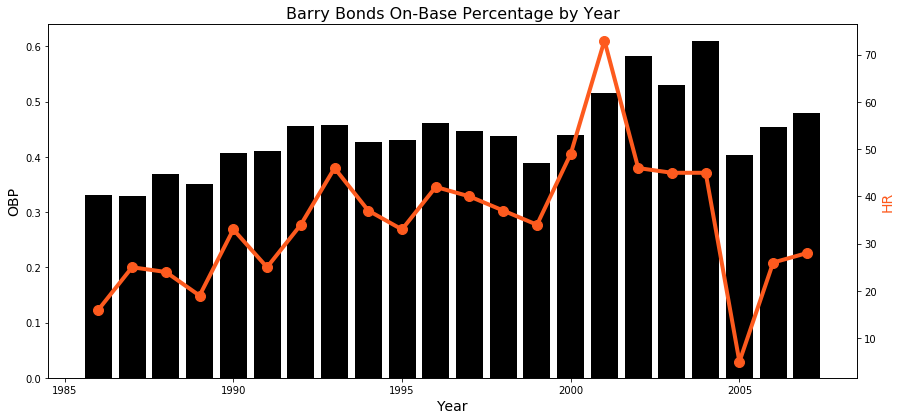

In [70]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar('yearID', 'OBP', data=bonds, color='black')
ax2.plot('yearID', 'HR', data=bonds, marker='o',linewidth = 4,markersize = 10,color='#fd5a1e')

ax1.set_xlabel('Year', size = 14)
ax1.set_ylabel('OBP', color='black', size = 14)
ax2.set_ylabel('HR', color='#fd5a1e', size=14)
# plt.figure(figsize=(15,7))
fig.set_size_inches(14.5, 6.5)
plt.title("Barry Bonds On-Base Percentage by Year", size = 16)
plt.show()